# VizTransits Example

VizTransits can return the number of transits that exist, but it primarily is a tool to plot all the transits on one figure along with a folded transit.

In [1]:
from exovetter.tce import Tce
from exovetter import vetters as vet
from exovetter import const as exo_const
import lightkurve as lk
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Setup
Exovetter vetting alogrithms (including VizTransits) use TCE and lightkurve objects as input

In [2]:
# WASP-18 b TCE:
period = 0.94145223 * u.day
epoch = 1354.4579 * u.day
epoch_offset = exo_const.btjd
depth = 0.00931894 * exo_const.frac_amp
duration = 0.08932 * u.day

# create a TCE object using the exovetter.tce.Tce class
tce = Tce(period=period, epoch=epoch, epoch_offset=epoch_offset, 
          depth=depth, duration=duration, comment='example')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 1354.4579 d>,
 'epoch_offset': <Quantity -2457000. d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'comment': 'example'}

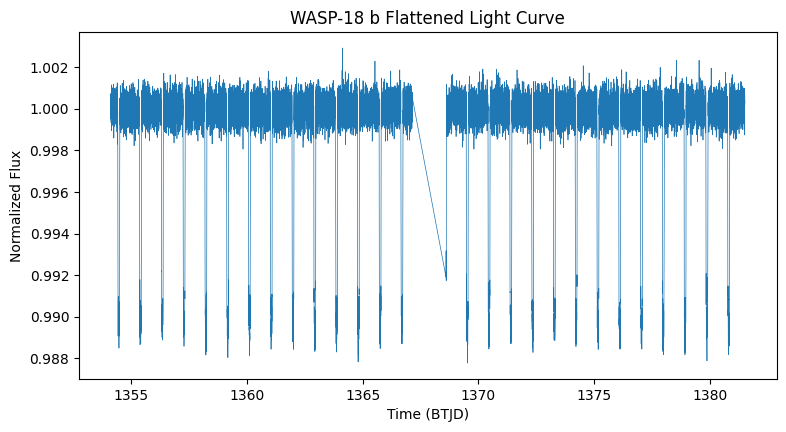

In [3]:
# Read in the flattened WASP-18 b lightkurve object
lc = lk.read('wasp18b.fits')

# plot light curve
plt.figure(figsize=(9,4.5))
plt.plot(lc.time.value, lc.flux.value, lw=0.5) 
plt.title('WASP-18 b Flattened Light Curve')
plt.xlabel('Time (BTJD)')
plt.ylabel('Normalized Flux')
plt.show()

## Visualizations 

Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.VizTransits`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
viz_instance = vet.VizTransits() 
viz_results = viz_instance.run(tce, lc)
viz_results


{'num_transits': 28}

Like other vetters, VizTransit can create plots using the `plot=True` parameter when running or by calling `viz_instance.plot()` which will generate all diagnostic plots, but it is unique in that the parameters `transit_plot` and `folded_plot` can be directly toggled when initializing the object to determine which plots are generated when running the vetter.

{'num_transits': 28}

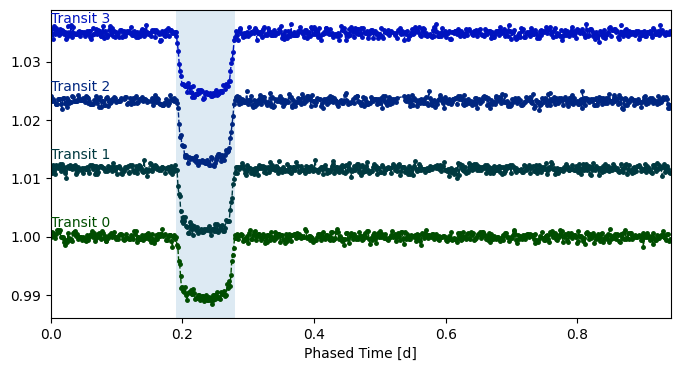

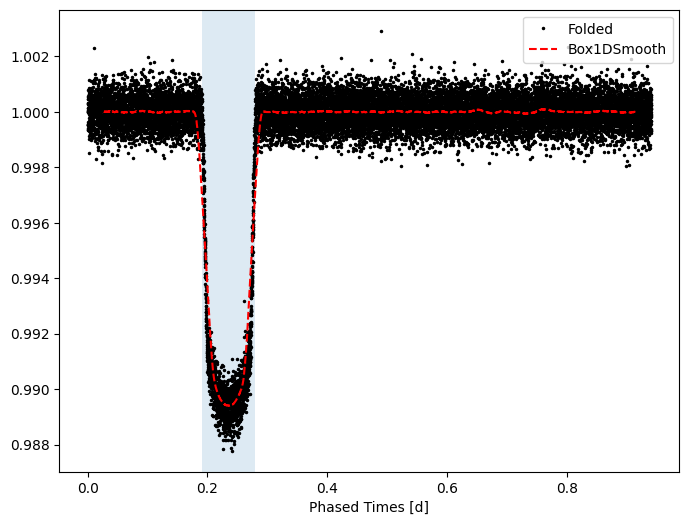

In [5]:
viz_instance = vet.VizTransits(lc_name="flux", max_transits=4, transit_plot=True, folded_plot=True)
viz_instance.run(tce, lc)
